In [5]:
import plotly.express as px
import pandas as pd
import osmnx as ox
import geopandas as gpd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

In [36]:
def map(df):
    
    fig = px.scatter_map(df, lat="lat", lon="lon", hover_name="name",
                            color_discrete_sequence=["fuchsia"], zoom=3, height=300)
    fig.update_layout(map_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

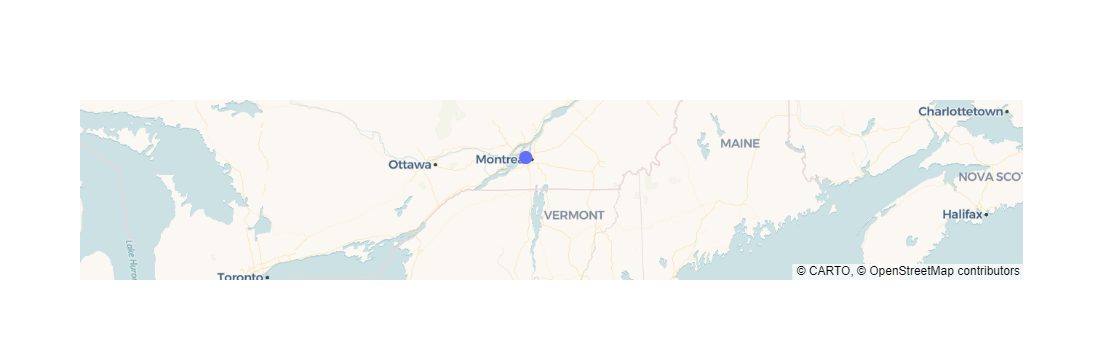

In [37]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattermap(
        lat=['45.5017'],
        lon=['-73.5673'],
        mode='markers',
        marker=go.scattermap.Marker(
            size=14
        ),
        text=['Montreal'],
    ))

fig.update_layout(
    hovermode='closest',
    map=dict(
        bearing=0,
        center=go.layout.map.Center(
            lat=45,
            lon=-73
        ),
        pitch=0,
        zoom=5
    )
)

fig.show()

In [34]:
def plot_nearby_places(address, distance=500):
    # Инициализируем геоколлектор
    geolocator = Nominatim(user_agent="i2d")

    # Получаем координаты по адресу
    location = geolocator.geocode(address)
    if location is None:
        print("Не удалось найти адрес.")
        return

    # Получаем координаты
    latitude = location.latitude
    longitude = location.longitude

    # Создаем точку на карте
    point = gpd.GeoDataFrame(geometry=gpd.points_from_xy([longitude], [latitude]), crs="EPSG:4326")

    # Находим заведения поблизости
    tags = {'amenity': True}
    nearby_places = ox.features.features_from_point((latitude, longitude), dist=distance, tags=tags)
    data_lon = []
    data_lat = []
    nearby_places = nearby_places[['name', 'geometry']]
    n_p = nearby_places.copy(deep=True)
    indexes_to_del = []
    for i, r in nearby_places.iterrows():
        # print((r['geometry']))
        if str(r['geometry']).startswith("POINT"):
            x,y = r['geometry'].x,r['geometry'].y
            data_lon.append(x)
            data_lat.append(y)
        else:
            indexes_to_del.append(i)
            
    n_p = nearby_places.drop(indexes_to_del)
    n_p['lon'] = data_lon
    n_p['lat'] = data_lat
        

    print(n_p)
    map(n_p)

                                  name                   geometry        lon  \
element_type osmid                                                             
node         529550640             ВТБ  POINT (37.61398 55.75714)  37.613981   
             784052391             NaN  POINT (37.61735 55.75486)  37.617345   
             1074714681   Фестивальное  POINT (37.62266 55.75453)  37.622660   
             1074714701            NaN  POINT (37.62280 55.75402)  37.622805   
             1074714713   Столовая №57  POINT (37.62336 55.75421)  37.623361   
...                                ...                        ...        ...   
             12020167805       Сгоряча  POINT (37.61767 55.75793)  37.617673   
             12084636507  Пан Круассан  POINT (37.61472 55.75593)  37.614717   
             12112361264          СДЭК  POINT (37.61620 55.75619)  37.616197   
             12198973957      Öz kebab  POINT (37.62745 55.75709)  37.627445   
             12273425606    Varvarka 3  

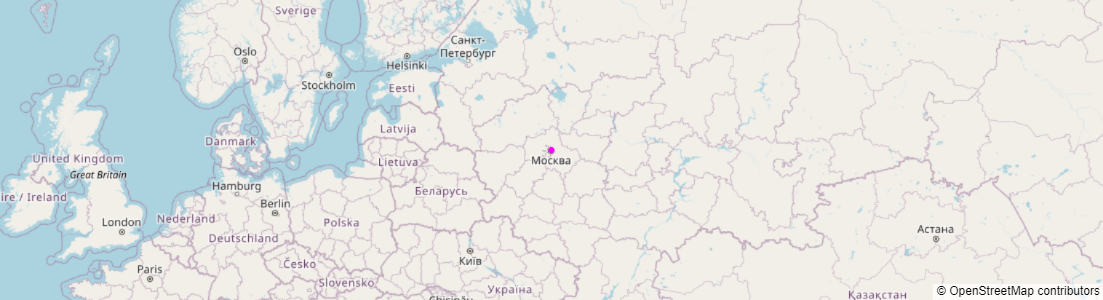

In [38]:
plot_nearby_places("Россия, Москва, Красная Площадь")